<h1>
<font color="#ff2e2e">
Mask Overlay
</font>
</h1>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import dlib

<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [4]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> Complete put_mask function </font></h3>

In [9]:
def put_mask(face, mask):
    '''
    Adds mask image on face image.
    
    Parameters:
        face (numpy.ndarray): face image.
        mask (numpy.ndarray): mask image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    det=dlib.get_frontal_face_detector()
    predict=dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
    rects=det(face,1)
    f_kp=np.empty((70,2),dtype=np.float32)
    for _,i in enumerate(rects):
        shape=predict(face,i)
        t=shape.num_parts
        for j in range(t):
            f_kp[j]=(shape.part(j).x,shape.part(j).y)
            
    sp = np.float32([h,])
    tp=f_kp[[1,4,12,15]]
    
    transform_mat = cv2.getPerspectiveTransform(sp, tp)
    transformed_mask = cv2.warpPerspective(mask, transform_mat, (face.shape[1], face.shape[0]))
    bacmask = np.repeat(np.reshape(transformed_mask[:, :, 0] == 0, (face.shape[0], face.shape[1], 1)), 4, axis=-1)
    transformed_mask = cv2.cvtColor(transformed_mask, cv2.COLOR_RGB2RGBA)
    rgb_face = cv2.cvtColor(face, cv2.COLOR_RGB2RGBA)
    result = rgb_face * bacmask + transformed_mask * (1 - bacmask)
    
    
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

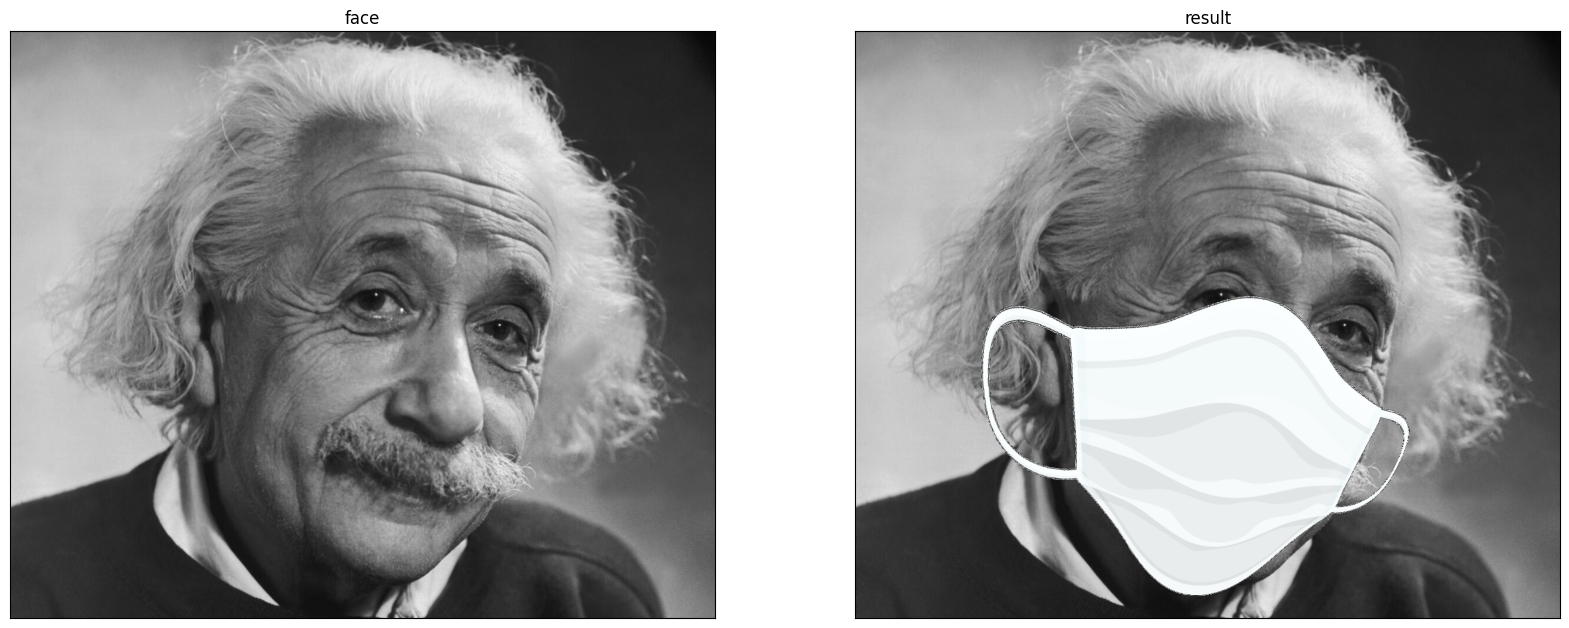

In [10]:
image_list = []
face = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'face.jpg')), cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(cv2.imread(os.path.join('images/Q3', 'mask.jpg')), cv2.COLOR_BGR2RGB)
image_list.append([face, 'face', 'img'])
image_list.append([put_mask(face, mask), 'result', 'img'])
plotter(image_list, 1, 2, True, 20, 10, '3')